<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2627 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9767


In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9730


(0.08375442773103714, 0.9729999899864197)

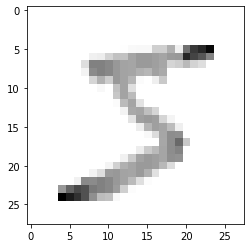

In [26]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
# print(x_train[0])

## Save model and download as zip

In [31]:
model.save('number_identifier.model')

INFO:tensorflow:Assets written to: number_identifier.model/assets


In [32]:
!zip -r /content/file.zip /content/number_identifier.model

  adding: content/number_identifier.model/ (stored 0%)
  adding: content/number_identifier.model/saved_model.pb (deflated 87%)
  adding: content/number_identifier.model/assets/ (stored 0%)
  adding: content/number_identifier.model/variables/ (stored 0%)
  adding: content/number_identifier.model/variables/variables.index (deflated 63%)
  adding: content/number_identifier.model/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: content/number_identifier.model/keras_metadata.pb (deflated 87%)


In [33]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load Saved Model

In [34]:
new_model = tf.keras.models.load_model('number_identifier.model')

In [35]:
predictions = new_model.predict(x_test)
predictions

array([[1.0533824e-08, 1.1157860e-07, 2.6750863e-06, ..., 9.9998736e-01,
        4.0394369e-08, 5.4591305e-07],
       [6.4649188e-09, 1.2650849e-05, 9.9998569e-01, ..., 7.8212498e-10,
        1.3895908e-07, 1.4286658e-13],
       [2.0141543e-07, 9.9976164e-01, 2.8832976e-05, ..., 1.6514056e-04,
        2.8462158e-05, 4.5256368e-07],
       ...,
       [6.5477512e-09, 1.8249106e-07, 1.7241289e-08, ..., 2.6076523e-05,
        5.3550448e-06, 2.0404134e-04],
       [1.5842759e-06, 4.9608298e-07, 1.7724783e-06, ..., 4.0201618e-07,
        1.1953812e-03, 3.6031945e-08],
       [2.6380278e-08, 1.6839801e-08, 3.9277722e-08, ..., 3.6581680e-12,
        3.0605804e-08, 8.5057961e-10]], dtype=float32)

1


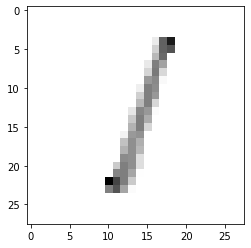

In [51]:
print(np.argmax(predictions[2]))
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()

4


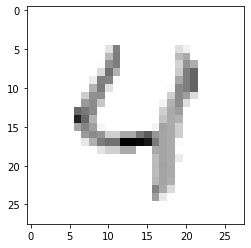

In [50]:
print(np.argmax(predictions[4]))
plt.imshow(x_test[4], cmap=plt.cm.binary)
plt.show()